# Supermarket data analysis

A Spanish supermarket chain has provided us with a file that includes data with sales information od three months from supermarkets located in 3 different Spanish cities.

You should analyze the historical record of sales data to:
1. answer the questions there are already in the notebook
2. extract **some conclusions and recommendations**  about their customers' purchase patterns.

The following are the columns included in the dataset:

* Invoice id: Computer generated sales slip invoice identification number

* Branch: Branch of supercenter (3 branches are available identified by A, B and C).

* City: Location of supercenters

* Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

* Gender: Gender type of customer

* Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

* Unit price: Price of each product in $

* Quantity: Number of products purchased by customer

* Date: Date of purchase (Record available from January 2019 to March 2019)

* Time: Purchase time (10am to 9pm)

* Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

* Gross margin measures a company's gross profit compared to its revenues as a percentage. A higher gross margin means a company retains more capital.

* Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

* Age: customer's age

## Import the libraries

In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

## Load the data from google drive

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Show the first rows to inspect the content of **df** variable.

In [49]:
file_path = '/content/drive/MyDrive/Informática para la Investigación/Entrega/supermarket.csv'
df = pd.read_csv(file_path)
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Gross cost,Payment,Rating,gross margin percentage,Date,Time,age
0,750-67-8428,A,Bilbao,Member,Female,Health and beauty,74.69,7,522.83,Ewallet,9.1,4.761905,1/5/2019,13:08,26
1,226-31-3081,C,Madrid,Normal,Female,Electronic accessories,15.28,5,76.40,Cash,9.6,4.761905,3/8/2019,10:29,52
2,631-41-3108,A,Bilbao,Normal,Male,Home and lifestyle,46.33,7,324.31,Credit card,7.4,4.761905,3/3/2019,13:23,46
3,123-19-1176,A,Bilbao,Member,Male,Health and beauty,58.22,8,465.76,Ewallet,8.4,4.761905,1/27/2019,20:33,18
4,373-73-7910,A,Bilbao,Normal,Male,Sports and travel,86.31,7,604.17,Ewallet,5.3,4.761905,2/8/2019,10:37,30


In [50]:
# Print the first 5 columns of the dataset
first_five_columns = df.iloc[:, :5]
print(first_five_columns)


       Invoice ID Branch       City Customer type  Gender
0     750-67-8428      A     Bilbao        Member  Female
1     226-31-3081      C     Madrid        Normal  Female
2     631-41-3108      A     Bilbao        Normal    Male
3     123-19-1176      A     Bilbao        Member    Male
4     373-73-7910      A     Bilbao        Normal    Male
...           ...    ...        ...           ...     ...
1010  233-67-5758      C     Madrid        Normal    Male
1011  303-96-2227      B  Barcelona        Normal  Female
1012  727-02-1313      A     Bilbao        Member    Male
1013  347-56-2442      A     Bilbao        Normal    Male
1014  849-09-3807      A     Bilbao        Member  Female

[1015 rows x 5 columns]


In [51]:
# Print the last 5 columns of the dataset
last_five_columns = df.iloc[:, -5:]
print(last_five_columns)


      Rating  gross margin percentage       Date   Time  age
0        9.1                 4.761905   1/5/2019  13:08   26
1        9.6                 4.761905   3/8/2019  10:29   52
2        7.4                 4.761905   3/3/2019  13:23   46
3        8.4                 4.761905  1/27/2019  20:33   18
4        5.3                 4.761905   2/8/2019  10:37   30
...      ...                      ...        ...    ...  ...
1010     6.2                 4.761905  1/29/2019  13:46   27
1011     4.4                 4.761905   3/2/2019  17:16   67
1012     7.7                 4.761905   2/9/2019  13:22   21
1013     4.1                 4.761905  2/22/2019  15:33   66
1014     6.6                 4.761905  2/18/2019  13:28   27

[1015 rows x 5 columns]


# Clean the dataset

Show information about the not-null values count and the types of the columns.

In [52]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1015 non-null   object 
 1   Branch                   1015 non-null   object 
 2   City                     1015 non-null   object 
 3   Customer type            1015 non-null   object 
 4   Gender                   1015 non-null   object 
 5   Product line             1012 non-null   object 
 6   Unit price               1010 non-null   float64
 7   Quantity                 1015 non-null   int64  
 8   Gross cost               1015 non-null   float64
 9   Payment                  1015 non-null   object 
 10  Rating                   1015 non-null   float64
 11  gross margin percentage  1015 non-null   float64
 12  Date                     1015 non-null   object 
 13  Time                     1015 non-null   object 
 14  age                     

How many rows and columns are there?

In [53]:
num_rows, num_columns = df.shape

print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

Number of rows: 1015
Number of columns: 15


How many rows are duplicated?

In [54]:
num_duplicates = df.duplicated().sum()
print(f'Number of duplicated rows: {num_duplicates}')

Number of duplicated rows: 1


How many missing values are there in each column? You should delete missing values.

In [55]:
missing_values = df.isna().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               3
Unit price                 5
Quantity                   0
Gross cost                 0
Payment                    0
Rating                     0
gross margin percentage    0
Date                       0
Time                       0
age                        0
dtype: int64


In [56]:
df_cleaned = df.dropna()
print("\nDataFrame shape after dropping missing values:")
print(df_cleaned.shape)


DataFrame shape after dropping missing values:
(1007, 15)


Delete gross margin percentage column.


In [57]:
df.drop(columns=['gross margin percentage'], inplace=True)

print("Columns:")
print(df.columns)

num_rows, num_columns = df.shape

print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

#Columns:
Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Gross cost', 'Payment',
       'Rating', 'Date', 'Time', 'age'],
      dtype='object')
Number of rows: 1015
Number of columns: 14


# Exploratory Data Analysis (7 points)

Create a new column, Tax, which is 5% of the gross cost.

In [59]:
df['Tax'] = df['Gross cost'] * 0.05

print("Primeras filas del DataFrame con la nueva columna 'Tax':")
print(df.head())

Primeras filas del DataFrame con la nueva columna 'Tax':
    Invoice ID Branch    City Customer type  Gender            Product line  \
0  750-67-8428      A  Bilbao        Member  Female       Health and beauty   
1  226-31-3081      C  Madrid        Normal  Female  Electronic accessories   
2  631-41-3108      A  Bilbao        Normal    Male      Home and lifestyle   
3  123-19-1176      A  Bilbao        Member    Male       Health and beauty   
4  373-73-7910      A  Bilbao        Normal    Male       Sports and travel   

   Unit price  Quantity  Gross cost      Payment  Rating       Date   Time  \
0       74.69         7      522.83      Ewallet     9.1   1/5/2019  13:08   
1       15.28         5       76.40         Cash     9.6   3/8/2019  10:29   
2       46.33         7      324.31  Credit card     7.4   3/3/2019  13:23   
3       58.22         8      465.76      Ewallet     8.4  1/27/2019  20:33   
4       86.31         7      604.17      Ewallet     5.3   2/8/2019  10:37   


Create a new column named **Members discount**, that applies 1% discount on the gross cost to members.

You can create conditional columns on Pandas with Numpy where() methods:
* The *numpy.where()* function returns the indices of elements in an input array where the given condition is satisfied.
* Syntax :numpy.where(condition, x, y)
* Parameters: condition : When True, yield x, otherwise yield y

In [60]:
df['Members discount'] = df['Gross cost'] * 0.01

print("Primeras filas del DataFrame con la nueva columna 'Members discount':")
print(df.head())

Primeras filas del DataFrame con la nueva columna 'Members discount':
    Invoice ID Branch    City Customer type  Gender            Product line  \
0  750-67-8428      A  Bilbao        Member  Female       Health and beauty   
1  226-31-3081      C  Madrid        Normal  Female  Electronic accessories   
2  631-41-3108      A  Bilbao        Normal    Male      Home and lifestyle   
3  123-19-1176      A  Bilbao        Member    Male       Health and beauty   
4  373-73-7910      A  Bilbao        Normal    Male       Sports and travel   

   Unit price  Quantity  Gross cost      Payment  Rating       Date   Time  \
0       74.69         7      522.83      Ewallet     9.1   1/5/2019  13:08   
1       15.28         5       76.40         Cash     9.6   3/8/2019  10:29   
2       46.33         7      324.31  Credit card     7.4   3/3/2019  13:23   
3       58.22         8      465.76      Ewallet     8.4  1/27/2019  20:33   
4       86.31         7      604.17      Ewallet     5.3   2/8/20

Create a new column, Total, which is the sum of gross cost and tax, subtracting the discount in case of members.

In [61]:
df['Total'] = df['Gross cost'] + df['Tax'] - np.where(df['Customer type'] == 'Member', df['Members discount'], 0)

print("Primeras filas del DataFrame con la nueva columna 'Total':")
print(df.head())

Primeras filas del DataFrame con la nueva columna 'Total':
    Invoice ID Branch    City Customer type  Gender            Product line  \
0  750-67-8428      A  Bilbao        Member  Female       Health and beauty   
1  226-31-3081      C  Madrid        Normal  Female  Electronic accessories   
2  631-41-3108      A  Bilbao        Normal    Male      Home and lifestyle   
3  123-19-1176      A  Bilbao        Member    Male       Health and beauty   
4  373-73-7910      A  Bilbao        Normal    Male       Sports and travel   

   Unit price  Quantity  Gross cost      Payment  Rating       Date   Time  \
0       74.69         7      522.83      Ewallet     9.1   1/5/2019  13:08   
1       15.28         5       76.40         Cash     9.6   3/8/2019  10:29   
2       46.33         7      324.31  Credit card     7.4   3/3/2019  13:23   
3       58.22         8      465.76      Ewallet     8.4  1/27/2019  20:33   
4       86.31         7      604.17      Ewallet     5.3   2/8/2019  10:37  

Split Date column into the following columns:  Month, Day and Year.

In [62]:
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year

print("Primeras filas del DataFrame con las nuevas columnas 'Month', 'Day' y 'Year':")
print(df.head())

Primeras filas del DataFrame con las nuevas columnas 'Month', 'Day' y 'Year':
    Invoice ID Branch    City Customer type  Gender            Product line  \
0  750-67-8428      A  Bilbao        Member  Female       Health and beauty   
1  226-31-3081      C  Madrid        Normal  Female  Electronic accessories   
2  631-41-3108      A  Bilbao        Normal    Male      Home and lifestyle   
3  123-19-1176      A  Bilbao        Member    Male       Health and beauty   
4  373-73-7910      A  Bilbao        Normal    Male       Sports and travel   

   Unit price  Quantity  Gross cost      Payment  Rating       Date   Time  \
0       74.69         7      522.83      Ewallet     9.1 2019-01-05  13:08   
1       15.28         5       76.40         Cash     9.6 2019-03-08  10:29   
2       46.33         7      324.31  Credit card     7.4 2019-03-03  13:23   
3       58.22         8      465.76      Ewallet     8.4 2019-01-27  20:33   
4       86.31         7      604.17      Ewallet     5.3 

Now, you don't need Date column, so delete it.

In [63]:
df.drop(columns=['Date'], inplace=True)

print("Primeras filas del DataFrame con las nuevas columnas 'Month', 'Day' y 'Year' (sin la columna 'Date'):")
print(df.head())

Primeras filas del DataFrame con las nuevas columnas 'Month', 'Day' y 'Year' (sin la columna 'Date'):
    Invoice ID Branch    City Customer type  Gender            Product line  \
0  750-67-8428      A  Bilbao        Member  Female       Health and beauty   
1  226-31-3081      C  Madrid        Normal  Female  Electronic accessories   
2  631-41-3108      A  Bilbao        Normal    Male      Home and lifestyle   
3  123-19-1176      A  Bilbao        Member    Male       Health and beauty   
4  373-73-7910      A  Bilbao        Normal    Male       Sports and travel   

   Unit price  Quantity  Gross cost      Payment  Rating   Time  age      Tax  \
0       74.69         7      522.83      Ewallet     9.1  13:08   26  26.1415   
1       15.28         5       76.40         Cash     9.6  10:29   52   3.8200   
2       46.33         7      324.31  Credit card     7.4  13:23   46  16.2155   
3       58.22         8      465.76      Ewallet     8.4  20:33   18  23.2880   
4       86.31     

Create a new dataframe called 'df_numerical' containing only the numerical columns (do not include the ones related to the date and time)

In [68]:
df_numerical = df.select_dtypes(include=[np.number])

df_numerical = df_numerical.drop(columns=['Month', 'Day', 'Year'], errors='ignore')

print("Primeras filas del DataFrame 'df_numerical' con solo las columnas numéricas:")
print(df_numerical.head())

Primeras filas del DataFrame 'df_numerical' con solo las columnas numéricas:
   Unit price  Quantity  Gross cost  Rating  age      Tax  Members discount  \
0       74.69         7      522.83     9.1   26  26.1415            5.2283   
1       15.28         5       76.40     9.6   52   3.8200            0.7640   
2       46.33         7      324.31     7.4   46  16.2155            3.2431   
3       58.22         8      465.76     8.4   18  23.2880            4.6576   
4       86.31         7      604.17     5.3   30  30.2085            6.0417   

      Total  
0  543.7432  
1   80.2200  
2  340.5255  
3  484.3904  
4  634.3785  


Plot an histogram for each of the columns in 'df_numerical'. More points if you do it with subplots of size (4,2)

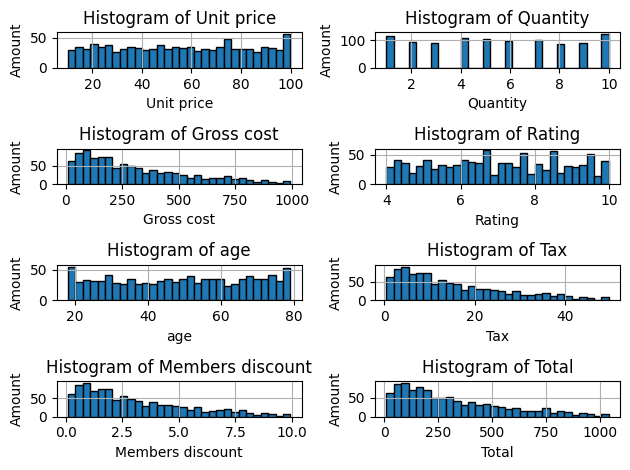

In [102]:
fig, axes = plt.subplots(nrows=4, ncols=2)

axes = axes.flatten()

for i, column in enumerate(df_numerical.columns):
    df_numerical[column].hist(ax=axes[i], bins=30, edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Amount')

plt.tight_layout()
plt.show()

Using 'df_numerical', compute the correlation between variables. What are the two variables that exhibit the most correlation between them?

In [76]:
correlation_matrix = df_numerical.corr()

correlation_pairs = correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False)

high_correlation_pairs = correlation_pairs[correlation_pairs < 1.0]

most_correlated_pair = high_correlation_pairs.idxmax()

highest_correlation_value = high_correlation_pairs.max()

print("Matriz de Correlación:")
print(correlation_matrix)

print("\nLas dos variables con la mayor correlación son:", most_correlated_pair)
print("Valor de la mayor correlación:", highest_correlation_value)

Matriz de Correlación:
                  Unit price  Quantity  Gross cost    Rating       age  \
Unit price          1.000000  0.013330    0.633921 -0.010287 -0.022873   
Quantity            0.013330  1.000000    0.708750 -0.016894 -0.014820   
Gross cost          0.633921  0.708750    1.000000 -0.040242 -0.001023   
Rating             -0.010287 -0.016894   -0.040242  1.000000 -0.016051   
age                -0.022873 -0.014820   -0.001023 -0.016051  1.000000   
Tax                 0.633921  0.708750    1.000000 -0.040242 -0.001023   
Members discount    0.633921  0.708750    1.000000 -0.040242 -0.001023   
Total               0.633901  0.708685    0.999969 -0.040109 -0.001226   

                       Tax  Members discount     Total  
Unit price        0.633921          0.633921  0.633901  
Quantity          0.708750          0.708750  0.708685  
Gross cost        1.000000          1.000000  0.999969  
Rating           -0.040242         -0.040242 -0.040109  
age              -0.00102

For the following questions go back to using the dataframe with all columns, not only the numerical ones

Using the loc property, find how many invoices of the A branch have cost more than 900

In [77]:
num_invoices_A_branch_over_900 = df.loc[(df['Branch'] == 'A') & (df['Total'] > 900)].shape[0]

print("Número de facturas de la sucursal A con un costo mayor a 900:", num_invoices_A_branch_over_900)

Número de facturas de la sucursal A con un costo mayor a 900: 6


Display columns 5 to 7 (Product line, Unit price and Quantity) and rows 500 to 510 using the iloc property

In [78]:
selected_data = df.iloc[500:511, 5:8]

print("Columnas 5 a 7 y filas 500 a 510:")
print(selected_data)

Columnas 5 a 7 y filas 500 a 510:
               Product line  Unit price  Quantity
500       Sports and travel       73.97         1
501     Fashion accessories       31.90         1
502      Home and lifestyle       69.40         2
503       Sports and travel       93.31         2
504       Sports and travel       88.45         1
505  Electronic accessories       24.18         8
506       Sports and travel       48.50         3
507      Food and beverages       84.05         6
508       Health and beauty       61.29         5
509      Home and lifestyle       15.95         6
510       Sports and travel       90.74         7


Using the loc property, change the value Ewallet in the Payment column to E-wallet.

In [79]:
df.loc[df['Payment'] == 'Ewallet', 'Payment'] = 'E-wallet'

print(df['Payment'].value_counts())

Payment
E-wallet       354
Cash           347
Credit card    314
Name: count, dtype: int64


How many products have women bought in branch A?

In [80]:
num_products_bought_by_women_in_A = df.loc[(df['Branch'] == 'A') & (df['Gender'] == 'Female'), 'Quantity'].sum()

print(f'Número de productos comprados por mujeres en la sucursal A: {num_products_bought_by_women_in_A}')

Número de productos comprados por mujeres en la sucursal A: 921


How many invoices have been made for men in branch C?

In [81]:
num_invoices_for_men_in_C = df.loc[(df['Branch'] == 'C') & (df['Gender'] == 'Male'), 'Invoice ID'].nunique()

print(f'Número de facturas para hombres en la sucursal C: {num_invoices_for_men_in_C}')

Número de facturas para hombres en la sucursal C: 150


Show how many invoices have been made for each branch, specifying whether they were for men or women.

In [82]:
invoice_counts = df.groupby(['Branch', 'Gender'])['Invoice ID'].nunique().reset_index()

invoice_counts.columns = ['Branch', 'Gender', 'Invoice Count']

print(invoice_counts)

  Branch  Gender  Invoice Count
0      A  Female            161
1      A    Male            179
2      B  Female            162
3      B    Male            170
4      C  Female            178
5      C    Male            150


Displays in a countplot graph the payment methods and product lines of the men who have purchased from Branch C.

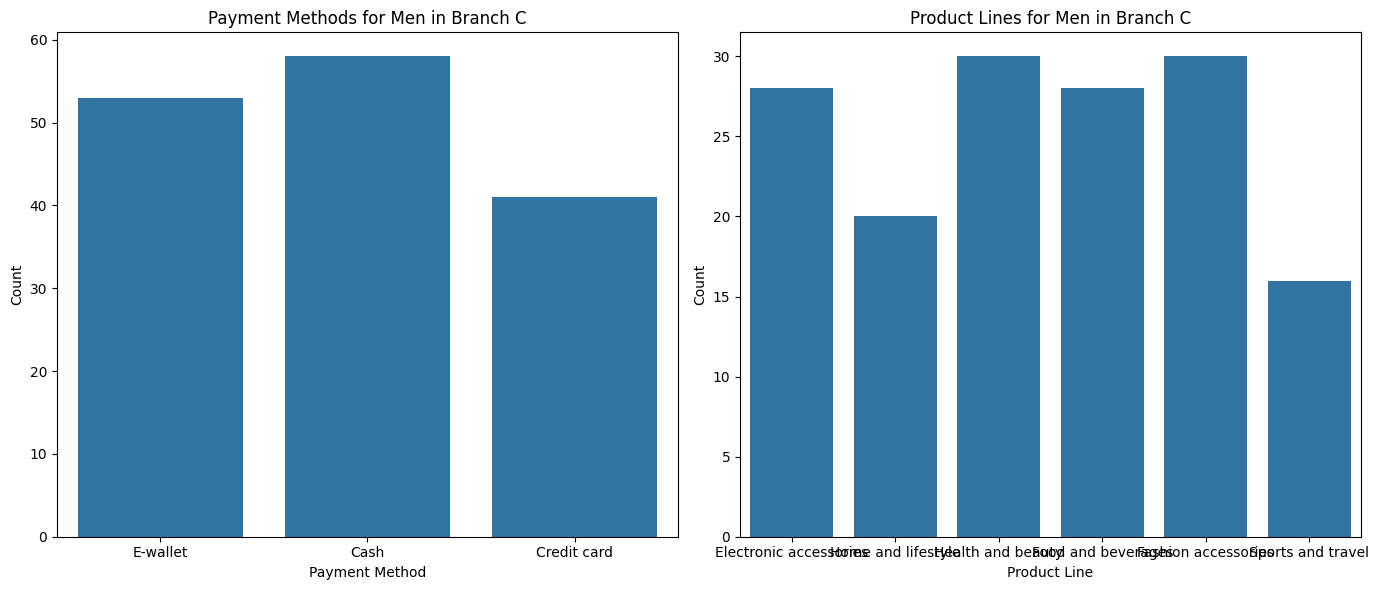

In [84]:
df_men_C = df.loc[(df['Branch'] == 'C') & (df['Gender'] == 'Male')]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=df_men_C, x='Payment')
plt.title('Payment Methods for Men in Branch C')
plt.xlabel('Payment Method')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(data=df_men_C, x='Product line')
plt.title('Product Lines for Men in Branch C')
plt.xlabel('Product Line')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Display in a countplot graph the payment methods and product lines of the women who have purchased from Branch A.

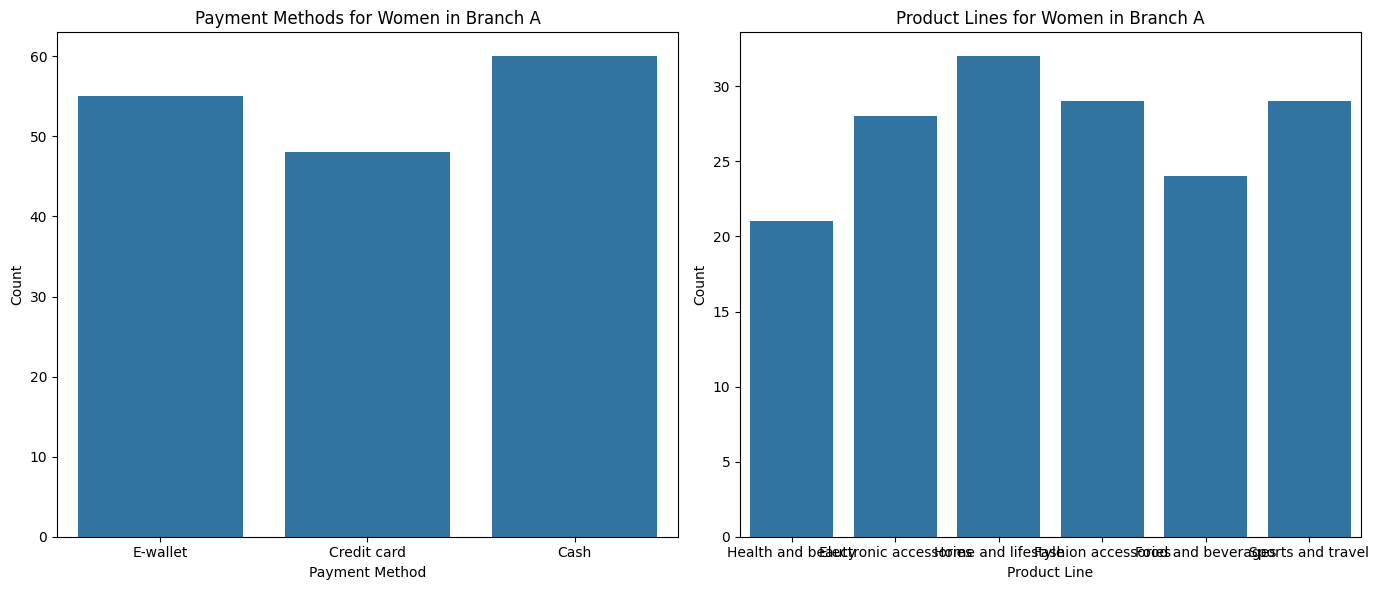

In [85]:
df_women_A = df.loc[(df['Branch'] == 'A') & (df['Gender'] == 'Female')]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=df_women_A, x='Payment')
plt.title('Payment Methods for Women in Branch A')
plt.xlabel('Payment Method')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(data=df_women_A, x='Product line')
plt.title('Product Lines for Women in Branch A')
plt.xlabel('Product Line')
plt.ylabel('Count')

# Ajustar el layout
plt.tight_layout()
plt.show()

Which product line is most purchased by member customers and which product line is most purchased by normal customers?

In [86]:
most_purchased_by_members = df.loc[df['Customer type'] == 'Member', 'Product line'].value_counts().idxmax()

most_purchased_by_normals = df.loc[df['Customer type'] == 'Normal', 'Product line'].value_counts().idxmax()

print(f'La línea de producto más comprada por los clientes miembros es: {most_purchased_by_members}')
print(f'La línea de producto más comprada por los clientes normales es: {most_purchased_by_normals}')

La línea de producto más comprada por los clientes miembros es: Food and beverages
La línea de producto más comprada por los clientes normales es: Fashion accessories


For how many years do we have data?

In [87]:
num_years = df['Year'].nunique()

print(f'Número de años de datos disponibles: {num_years}')

Número de años de datos disponibles: 1


In which month did customers buy the most products?

In [88]:
total_products_per_month = df.groupby('Month')['Quantity'].sum()

most_products_month = total_products_per_month.idxmax()
most_products_month_quantity = total_products_per_month.max()

print(f'El mes en el que los clientes compraron más productos es: {most_products_month} con un total de {most_products_month_quantity} productos comprados.')

El mes en el que los clientes compraron más productos es: 1 con un total de 1992 productos comprados.


In which month did customers spend the most money?

In [89]:

total_spent_per_month = df.groupby('Month')['Total'].sum()

most_money_spent_month = total_spent_per_month.idxmax()
most_money_spent_amount = total_spent_per_month.max()

print(f'El mes en el que los clientes gastaron más dinero es: {most_money_spent_month} con un total de {most_money_spent_amount:.2f} unidades monetarias.')

El mes en el que los clientes gastaron más dinero es: 1 con un total de 117729.88 unidades monetarias.


In which month have there been more purchases by member customers than normal customers?

In [90]:
member_purchases = df[df['Customer type'] == 'Member']
normal_purchases = df[df['Customer type'] == 'Normal']

member_purchases_per_month = member_purchases['Month'].value_counts().sort_index()
normal_purchases_per_month = normal_purchases['Month'].value_counts().sort_index()

comparison_df = pd.DataFrame({
    'Member Purchases': member_purchases_per_month,
    'Normal Purchases': normal_purchases_per_month
}).fillna(0)

months_with_more_member_purchases = comparison_df[comparison_df['Member Purchases'] > comparison_df['Normal Purchases']]

print("Meses en los que los clientes miembros realizaron más compras que los clientes normales:")
print(months_with_more_member_purchases)

Meses en los que los clientes miembros realizaron más compras que los clientes normales:
       Member Purchases  Normal Purchases
Month                                    
2                   166               144


Which product line has had the most products rated as a 10?

In [94]:
most_rated_10_product_line = df.loc[df['Rating'] == 10, 'Product line'].value_counts().idxmax()

print(f'La línea de producto con la mayor cantidad de productos calificados con un 10 es: {most_rated_10_product_line}')

La línea de producto con la mayor cantidad de productos calificados con un 10 es: Sports and travel


Display product lines with a rating of 9 or more in a boxplot.

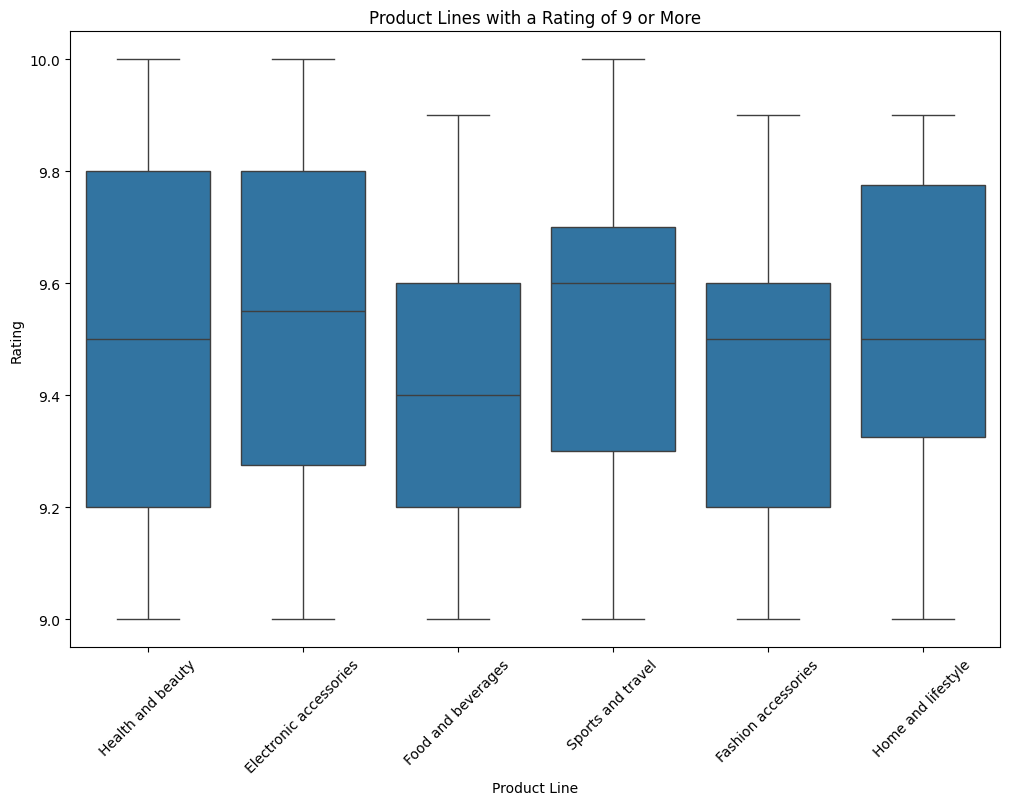

In [93]:
high_rated_products = df[df['Rating'] >= 9]

plt.figure(figsize=(12, 8))
sns.boxplot(data=high_rated_products, x='Product line', y='Rating')
plt.title('Product Lines with a Rating of 9 or More')
plt.xlabel('Product Line')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

Display in a plot the hours in which more than 20 products are purchased.

<ipython-input-95-082b2424f383>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time']).dt.hour


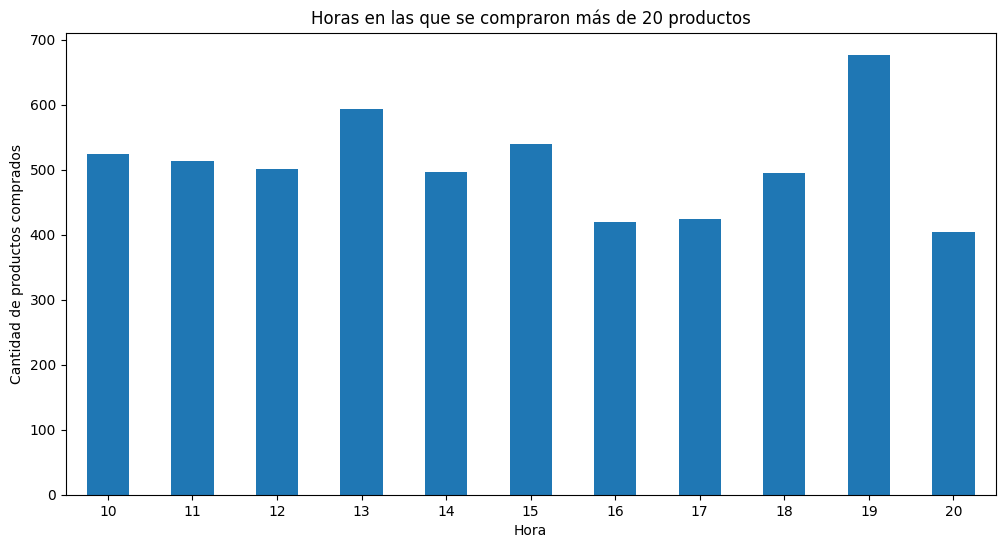

In [95]:
df['Time'] = pd.to_datetime(df['Time']).dt.hour

products_per_hour = df.groupby('Time')['Quantity'].sum()

hours_with_more_than_20_products = products_per_hour[products_per_hour > 20]

plt.figure(figsize=(12, 6))
hours_with_more_than_20_products.plot(kind='bar')
plt.title('Horas en las que se compraron más de 20 productos')
plt.xlabel('Hora')
plt.ylabel('Cantidad de productos comprados')
plt.xticks(rotation=0)
plt.show()


Show in a pie chart the percentage of products purchased in each city.

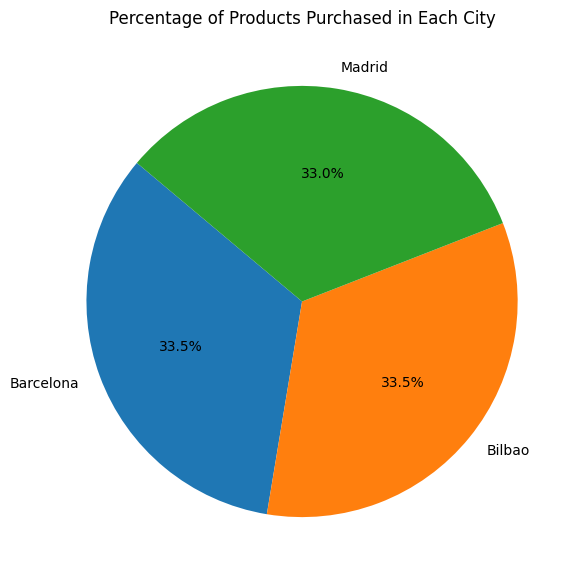

In [96]:
products_per_city = df.groupby('City')['Quantity'].sum()

plt.figure(figsize=(10, 7))
products_per_city.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Products Purchased in Each City')
plt.ylabel('')
plt.show()

Show in a pie chart  the percentage of customers under 30 years old per city

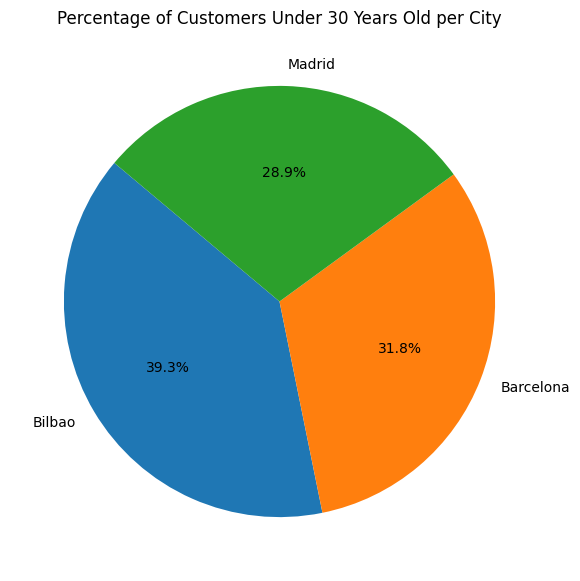

In [97]:
under_30 = df[df['age'] < 30]

under_30_per_city = under_30['City'].value_counts()

plt.figure(figsize=(10, 7))
under_30_per_city.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Customers Under 30 Years Old per City')
plt.ylabel('')
plt.show()

# Other interesting analylsis to carry out (1.5 points)

What other analysis could be interesting for the supermarket? Please, provide two proposals with the required code to test them.

In [99]:
most_purchased_product_by_men = df[df['Gender'] == 'Male']['Product line'].value_counts().idxmax()

most_purchased_product_by_women = df[df['Gender'] == 'Female']['Product line'].value_counts().idxmax()

print(f'El tipo de artículo más comprado por los hombres es: {most_purchased_product_by_men}')
print(f'El tipo de artículo más comprado por las mujeres es: {most_purchased_product_by_women}')

El tipo de artículo más comprado por los hombres es: Health and beauty
El tipo de artículo más comprado por las mujeres es: Fashion accessories


In [103]:
rating_stats = df.groupby(['City', 'Product line'])['Rating'].agg(['mean', 'max', 'min'])

rating_stats_sorted = rating_stats.sort_values(by=['City', 'Product line'])

print(rating_stats_sorted)

                                      mean   max  min
City      Product line                               
Barcelona Electronic accessories  7.116364  10.0  4.0
          Fashion accessories     6.748437   9.9  4.1
          Food and beverages      6.994000   9.9  4.0
          Health and beauty       7.057143   9.9  4.0
          Home and lifestyle      6.474510   9.8  4.1
          Sports and travel       6.529508  10.0  4.1
Bilbao    Electronic accessories  6.942623   9.9  4.3
          Fashion accessories     6.873077   9.9  4.0
          Food and beverages      7.215000   9.9  4.0
          Health and beauty       6.900000  10.0  4.2
          Home and lifestyle      6.887879   9.9  4.1
          Sports and travel       7.257627   9.9  4.1
Madrid    Electronic accessories  6.689474   9.8  4.1
          Fashion accessories     7.407813   9.9  4.0
          Food and beverages      7.080303   9.9  4.0
          Health and beauty       6.983019   9.9  4.1
          Home and lifestyle

# Conclusions (1.5 points)

Please, write the conclusiones you can extract from the analysis and the recommendations you would provide to the supermarket.

Con los datos en la mano habría que realizar un analisis en detalle para saber por qué hay ratings tan distintos en determindas lineas de producto dependiendo de la ciudad.

Por otro lado a partir de la salida del trabajo de la gente (desde las 17h hasta las 19h incluido) hay bastante aumento de ventas, puede ser interesante reforzar el personal de trabajo con alguien a media jornada.